In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
# https://scikit-learn.org/1.5/auto_examples/datasets/plot_iris_dataset.html

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# https://scikit-learn.org/1.5/modules/generated/sklearn.preprocessing.StandardScaler.html

from sklearn.neighbors import KNeighborsClassifier
# https://scikit-learn.org/0.15/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

from sklearn.metrics import accuracy_score

from sklearn.model_selection import cross_val_score
#splitting data into three sets (train - test - val)

In [ ]:
iris = load_iris()
X = iris.data #features
y = iris.target #target/label/class

print(iris.feature_names)
print(iris.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


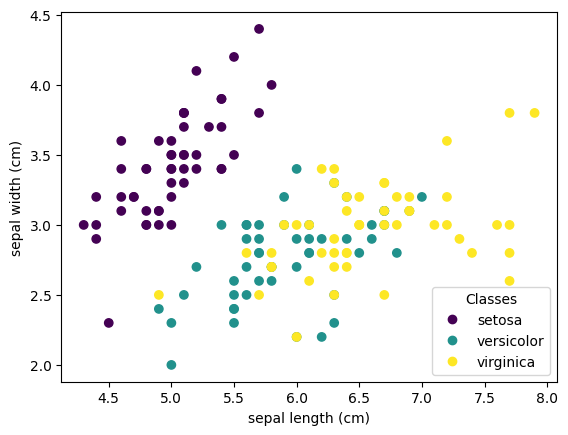

In [ ]:
# plotting the dataset
import matplotlib.pyplot as plt

_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

In [ ]:
scaler = StandardScaler() # data won't get biased towards any large value
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
k = 5  # could have used any other k value
knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.97


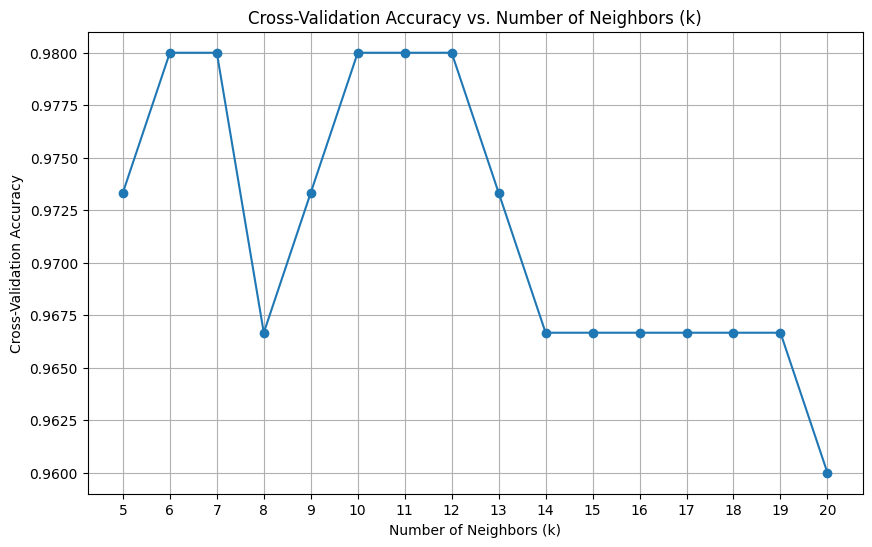

The best k value based on cross-validation is 6 with an accuracy of 0.98


In [ ]:
cross_val_accuracies = []
k_values = range(5, 21)

# Cross-validation for each k value
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=5)  # 5-fold cross-validation, cv=5 is the default value
    cross_val_accuracies.append(np.mean(scores))

# Plot cross-validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, cross_val_accuracies, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Cross-Validation Accuracy')
plt.title('Cross-Validation Accuracy vs. Number of Neighbors (k)')
plt.xticks(k_values)
plt.grid()
plt.show()

# Find the best k value based on cross-validation
best_k_cv = k_values[np.argmax(cross_val_accuracies)]
print(f'The best k value based on cross-validation is {best_k_cv} with an accuracy of {max(cross_val_accuracies):.2f}')

# Implementing KNN Classifier from Scratch

In [ ]:
class KNN:
    def __init__(self, k):

        self.k = k

        self.X_train = None
        self.y_train = None

    def euclidean_distance(self, point1, point2):

        distance = 0
        for i in range(len(point1)):
            distance += (point1[i] - point2[i]) ** 2
        return distance ** 0.5

    def fit(self, X_train, y_train):

        self.X_train = X_train
        self.y_train = y_train

    def predict(self, X_test):

        predictions = []

        for x in X_test:

            label = self.predict_label(x)
            predictions.append(label)
        return predictions

    def predict_label(self, x):

        distances = []
        for i in range(len(self.X_train)):
            dist = self.euclidean_distance(x, self.X_train[i])
            distances.append((dist, i))


        distances.sort()
        k_nearest = distances[:self.k]


        neighbor_labels = [self.y_train[i] for (_, i) in k_nearest]


        label_counts = {}
        for label in neighbor_labels:
            label_counts[label] = label_counts.get(label, 0) + 1


        max_count = 0
        most_common_label = None
        for label, count in label_counts.items():
            if count > max_count:
                max_count = count
                most_common_label = label

        return most_common_label

In [ ]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=41)

# Initialize KNN classifier with the value of n
knn = KNN(3)

# Fit the model
knn.fit(X_train, y_train)

# Predict on the test set
y_pred = knn.predict(X_test)

# Calculate accuracy (write down the equation to calculate accuracy, and uncomment the print function)

print(f"Accuracy of KNN from scratch: {accuracy * 100:.2f}%")

Accuracy of KNN from scratch: 96.67%
